<a href="https://colab.research.google.com/github/shinjinisen/data-privacy-pynb/blob/main/link2datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Code to link 2 datasets



In [ ]:
pip install recordlinkage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.9/926.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00


In [ ]:
import recordlinkage
from recordlinkage.datasets import load_febrl4

In [ ]:
dfA, dfB = load_febrl4()
dfA

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-1070-org,michaela,neumann,8,stanley street,miami,winston hills,4223,nsw,19151111,5304218
rec-1016-org,courtney,painter,12,pinkerton circuit,bega flats,richlands,4560,vic,19161214,4066625
rec-4405-org,charles,green,38,salkauskas crescent,kela,dapto,4566,nsw,19480930,4365168
rec-1288-org,vanessa,parr,905,macquoid place,broadbridge manor,south grafton,2135,sa,19951119,9239102
rec-3585-org,mikayla,malloney,37,randwick road,avalind,hoppers crossing,4552,vic,19860208,7207688
...,...,...,...,...,...,...,...,...,...,...
rec-2153-org,annabel,grierson,97,mclachlan crescent,lantana lodge,broome,2480,nsw,19840224,7676186
rec-1604-org,sienna,musolino,22,smeaton circuit,pangani,mckinnon,2700,nsw,19890525,4971506
rec-1003-org,bradley,matthews,2,jondol place,horseshoe ck,jacobs well,7018,sa,19481122,8927667


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date_of_birth']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date_of_birth'}, axis=1)
              .sort_values('date_of_birth', ascending=True))
  xs = counted['date_of_birth']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dfA.sort_values('date_of_birth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_of_birth')
_ = plt.ylabel('count()')

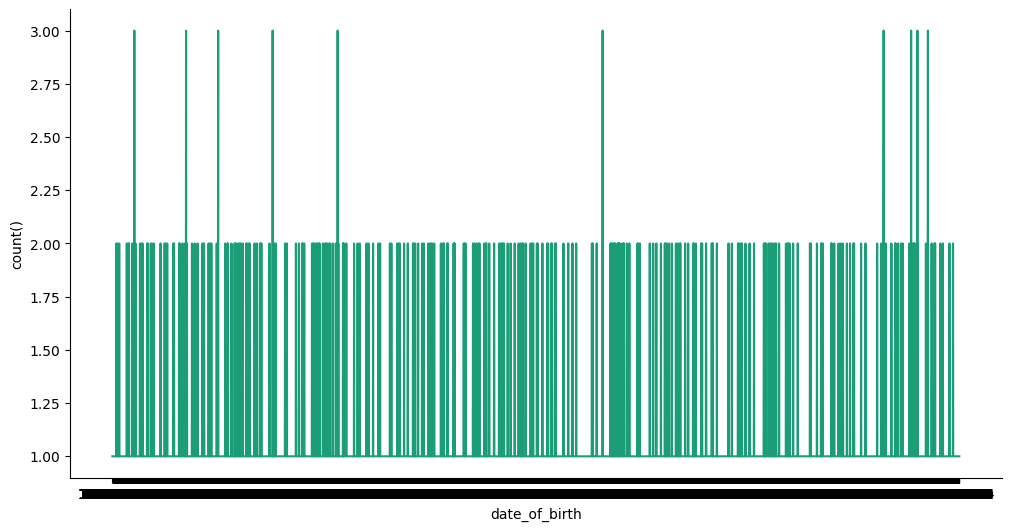

In [ ]:
# @title date_of_birth vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date_of_birth']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date_of_birth'}, axis=1)
              .sort_values('date_of_birth', ascending=True))
  xs = counted['date_of_birth']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dfA.sort_values('date_of_birth', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_of_birth')
_ = plt.ylabel('count()')

**Make record pairs**

compare each record in DataFrame dfA with all records of DataFrame dfB

In [ ]:
indexer = recordlinkage.Index()
indexer.full()
pairs = indexer.index(dfA, dfB)

In [ ]:
print(len(dfA), len(dfB), len(pairs))

5000 5000 25000000


In [ ]:
indexer = recordlinkage.Index()
indexer.block("given_name")
candidate_links = indexer.index(dfA, dfB)
len(candidate_links)

77249


Compare records

Each record pair is a candidate match. To classify the candidate record pairs into matches and non-matches, compare the records on all attributes both records have in common.

In [ ]:
compare_cl = recordlinkage.Compare()
compare_cl.exact("given_name", "given_name", label="given_name")
compare_cl.string(
    "surname", "surname", method="jarowinkler", threshold=0.85, label="surname"
)
compare_cl.exact("date_of_birth", "date_of_birth", label="date_of_birth")
compare_cl.exact("suburb", "suburb", label="suburb")
compare_cl.exact("state", "state", label="state")
compare_cl.string("address_1", "address_1", threshold=0.85, label="address_1")
features = compare_cl.compute(candidate_links, dfA, dfB)

The comparing of record pairs starts when the compute method is called. All attribute comparisons are stored in a DataFrame with horizontally the features and vertically the record pairs.

In [ ]:
features

given_name  surname  date_of_birth  suburb  \
rec_id_1     rec_id_2                                                     
rec-1070-org rec-3024-dup-0           1      0.0              0       0   
             rec-2371-dup-0           1      0.0              0       0   
             rec-4652-dup-0           1      0.0              0       0   
             rec-4795-dup-0           1      0.0              0       0   
             rec-1314-dup-0           1      0.0              0       0   
...                                 ...      ...            ...     ...   
rec-4528-org rec-4528-dup-0           1      1.0              1       1   
rec-4887-org rec-4887-dup-0           1      1.0              1       0   
rec-4350-org rec-4350-dup-0           1      1.0              1       1   
rec-4569-org rec-4569-dup-0           1      1.0              1       1   
rec-3125-org rec-3125-dup-0           1      1.0              1       0   

                             state  address_1  
rec_id_1     rec_id_2                          
rec-1070-org rec-3024-dup-0      1        0.0  
             rec-2371-dup-0      0        0.0  
             rec-4652-dup-0      0        0.0  
             rec-4795-dup-0      1        0.0  
             rec-1314-dup-0      1        0.0  
...                            ...        ...  
rec-4528-org rec-4528-dup-0      1        1.0  
rec-4887-org rec-4887-dup-0      1        1.0  
rec-4350-org rec-4350-dup-0      1        1.0  
rec-4569-org rec-4569-dup-0      1        0.0  
rec-3125-org rec-3125-dup-0      1        1.0  

[77249 rows x 6 columns]

In [ ]:
features.describe()

,given_name,surname,date_of_birth,suburb,state,address_1
count,77249.0,77249.000000,77249.000000,77249.000000,77249.000000,77249.000000
mean,1.0,0.044428,0.037929,0.032259,0.248767,0.036700
std,0.0,0.206045,0.191027,0.176689,0.432301,0.188024
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


from matplotlib import pyplot as plt
_df_16['given_name'].plot(kind='hist', bins=20, title='given_name')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['surname'].plot(kind='hist', bins=20, title='surname')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['date_of_birth'].plot(kind='hist', bins=20, title='date_of_birth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['suburb'].plot(kind='hist', bins=20, title='suburb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='given_name', y='surname', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='surname', y='date_of_birth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='date_of_birth', y='suburb', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='suburb', y='state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_of_birth']
  ys = series['given_name']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('date_of_birth', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_of_birth')
_ = plt.ylabel('given_name')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_of_birth']
  ys = series['surname']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('date_of_birth', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_of_birth')
_ = plt.ylabel('surname')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_of_birth']
  ys = series['suburb']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('date_of_birth', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_of_birth')
_ = plt.ylabel('suburb')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_of_birth']
  ys = series['state']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('date_of_birth', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_of_birth')
_ = plt.ylabel('state')

from matplotlib import pyplot as plt
_df_29['given_name'].plot(kind='line', figsize=(8, 4), title='given_name')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['surname'].plot(kind='line', figsize=(8, 4), title='surname')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['date_of_birth'].plot(kind='line', figsize=(8, 4), title='date_of_birth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['suburb'].plot(kind='line', figsize=(8, 4), title='suburb')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='given_name', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='surname', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='date_of_birth', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='suburb', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

 Decide which records belong to the same person

In [ ]:
features.sum(axis=1).value_counts().sort_index(ascending=False)

6.0     1566
5.0     1332
4.0      343
3.0      146
2.0    16427
1.0    57435
Name: count, dtype: int64

In [ ]:
features[features.sum(axis=1) > 3]

,,given_name,surname,date_of_birth,suburb,state,address_1
rec_id_1,rec_id_2,,,,,,
rec-2371-org,rec-2371-dup-0,1,1.0,1,1,1,1.0
rec-3024-org,rec-3024-dup-0,1,1.0,1,0,1,0.0
rec-4652-org,rec-4652-dup-0,1,1.0,1,0,1,1.0
rec-4795-org,rec-4795-dup-0,1,1.0,1,1,1,1.0
rec-1016-org,rec-1016-dup-0,1,1.0,1,1,0,1.0
...,...,...,...,...,...,...,...
rec-4528-org,rec-4528-dup-0,1,1.0,1,1,1,1.0
rec-4887-org,rec-4887-dup-0,1,1.0,1,0,1,1.0
rec-4350-org,rec-4350-dup-0,1,1.0,1,1,1,1.0


from matplotlib import pyplot as plt
_df_0['surname'].plot(kind='hist', bins=20, title='surname')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['date_of_birth'].plot(kind='hist', bins=20, title='date_of_birth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['suburb'].plot(kind='hist', bins=20, title='suburb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['state'].plot(kind='hist', bins=20, title='state')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='surname', y='date_of_birth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='date_of_birth', y='suburb', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='suburb', y='state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='state', y='address_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['given_name']
  ys = series['surname']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('given_name', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('given_name')
_ = plt.ylabel('surname')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['given_name']
  ys = series['suburb']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('given_name', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('given_name')
_ = plt.ylabel('suburb')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['given_name']
  ys = series['state']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('given_name', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('given_name')
_ = plt.ylabel('state')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['given_name']
  ys = series['address_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('given_name', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('given_name')
_ = plt.ylabel('address_1')

from matplotlib import pyplot as plt
_df_12['surname'].plot(kind='line', figsize=(8, 4), title='surname')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['date_of_birth'].plot(kind='line', figsize=(8, 4), title='date_of_birth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['suburb'].plot(kind='line', figsize=(8, 4), title='suburb')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['state'].plot(kind='line', figsize=(8, 4), title='state')
plt.gca().spines[['top', 'right']].set_visible(False)